In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
Data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'University_Rating','Chance of Admit':'Chance_of_Admit'},inplace=True)

In [4]:
data.drop('Serial No.', axis=1, inplace=True)
data.describe()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.isnull().sum()

GRE                  0
TOEFL                0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246F854A9C8>,
      dtype=object)

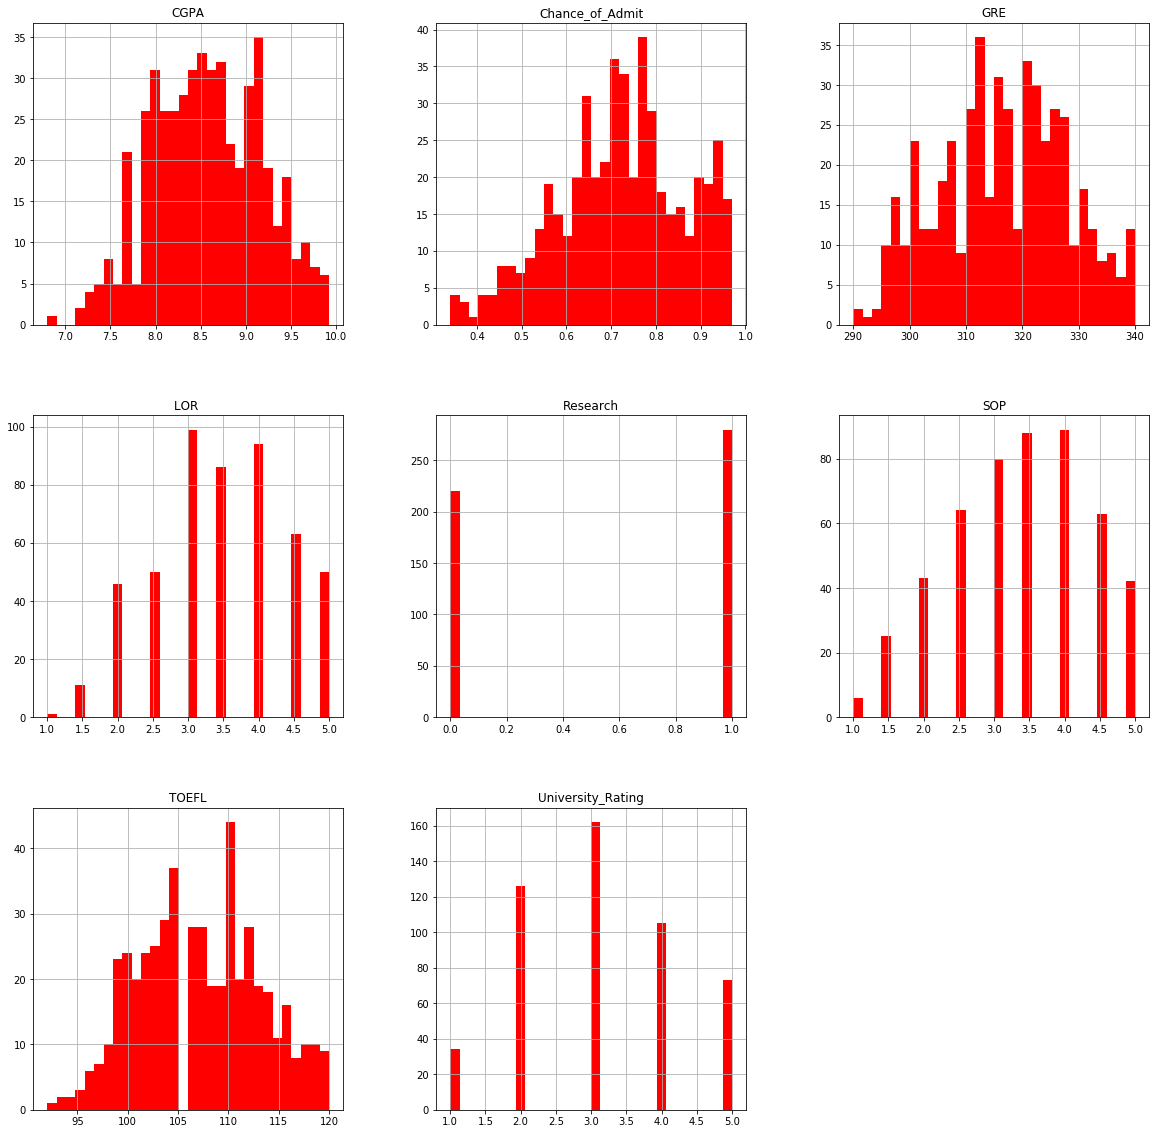

In [6]:
data.hist(bins=30,figsize=(20,20),color='red')

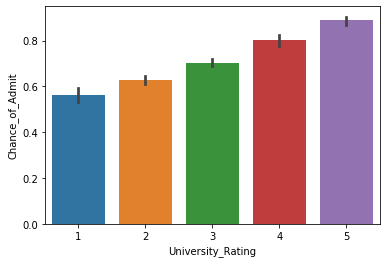

In [7]:
import seaborn as sb
sb.barplot(data.University_Rating,data.Chance_of_Admit)

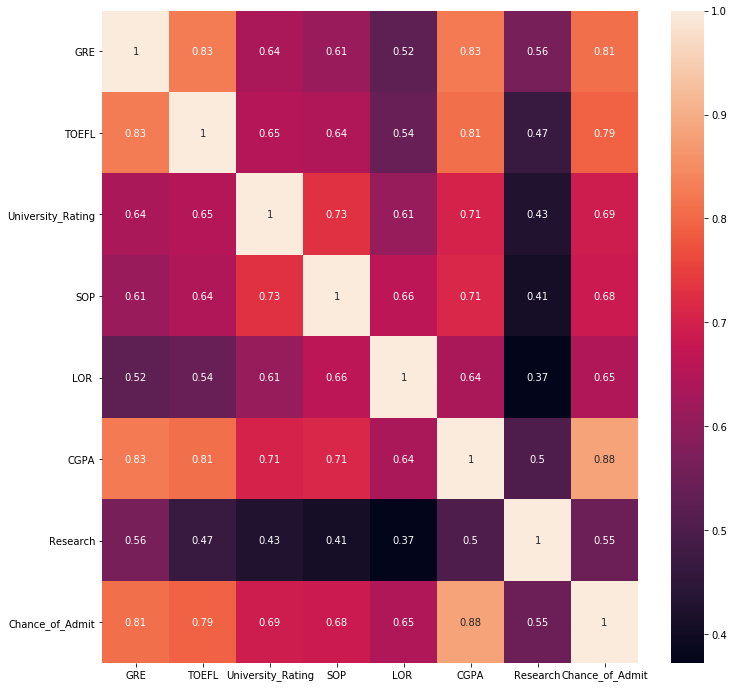

In [8]:
corr_matrix = data.corr()
plt.figure(figsize=(12,12))
sns  .heatmap(corr_matrix,annot=True)
plt.show()

In [9]:
(data.corr()**2)["Chance_of_Admit"].sort_values(ascending = False)[1:]

CGPA                 0.778652
GRE                  0.656668
TOEFL                0.627625
University_Rating    0.476283
SOP                  0.468043
LOR                  0.416495
Research             0.297975
Name: Chance_of_Admit, dtype: float64

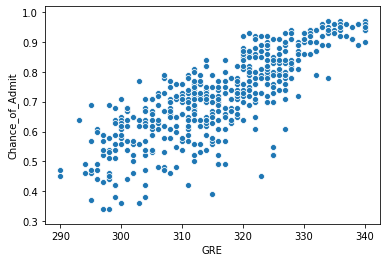

In [10]:
sb.scatterplot(data.GRE,data.Chance_of_Admit)

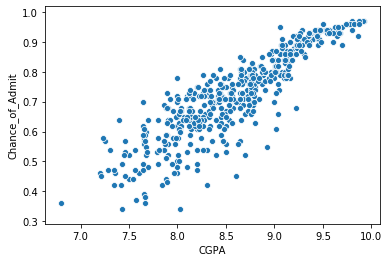

In [11]:
sb.scatterplot(data.CGPA,data.Chance_of_Admit)

In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [40]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, regressor.predict(X_train))))

print("R2 score on the test set:",r2_score(y_test, y_pred)*100)
print("R2 score on the training set:",r2_score(y_train, regressor.predict(X_train))*100)

RMSE score on the test set: 0.05881410457650769
RMSE score on the training set: 0.05977752557506849
R2 score on the test set: 82.08741703103732
R2 score on the training set: 82.15099192361265


In [50]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.99 %
Standard Deviation: 7.16 %


In [51]:
from sklearn.ensemble import AdaBoostRegressor
regressor1 = AdaBoostRegressor(n_estimators=75,learning_rate=0.25,random_state=1)
regressor1.fit(X_train, y_train)
y_pred=regressor1.predict(X_test)


In [52]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.25,0.5,0.75,1],'n_estimators':[20,50,75,100]}
tuning=GridSearchCV(estimator=regressor1,param_grid=LR)
tuning.fit(X_train, y_train)
tuning.best_params_

{'learning_rate': 0.25, 'n_estimators': 75}

In [53]:
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, regressor1.predict(X_train))))

print("R2 score on the test set:",r2_score(y_test, y_pred)*100)
print("R2 score on the training set:",r2_score(y_train, regressor1.predict(X_train))*100)

RMSE score on the test set: 0.06895638333511277
RMSE score on the training set: 0.05767631268055454
R2 score on the test set: 75.37681734421305
R2 score on the training set: 83.38374327998874


In [49]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.30 %
Standard Deviation: 8.47 %


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
regressor2 = GradientBoostingRegressor(n_estimators=75,learning_rate=0.25,random_state=1)
regressor2.fit(X_train, y_train)
y_pred=regressor1.predict(X_test)


In [59]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.25,0.5,0.75,1],'n_estimators':[20,50,75,100]}
tuning=GridSearchCV(estimator=regressor1,param_grid=LR)
tuning.fit(X_train, y_train)
tuning.best_params_

{'learning_rate': 0.25, 'n_estimators': 75}

In [60]:
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, regressor2.predict(X_train))))

print("R2 score on the test set:",r2_score(y_test, y_pred)*100)
print("R2 score on the training set:",r2_score(y_train, regressor2.predict(X_train))*100)

RMSE score on the test set: 0.06895638333511277
RMSE score on the training set: 0.029970420061084677
R2 score on the test set: 75.37681734421305
R2 score on the training set: 95.51333257901933
